# 2 Exploratory Data Analysis<a id='2_EDA'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Exploratory Data Analysis](#2_EDA)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load Data](#2.4_Load_Data)
  * [2.5 Make Stacked Column Graphs](#2.5_make_stacks)
  * [2.6 Identify Best Features](#2.6_best_features)  
  * [2.7 Make Dummy Variables](#2.7_make_dummies)
  * [2.8 Modeling with Random Forests](#2.8_random_forests)

## 2.2 Introduction<a id='2.2_Introduction'></a>

## 2.3 Imports<a id='2.3_Imports'></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch

## 2.4 Load Data<a id='2.4_Load_Data'></a>

In [22]:
df = pd.read_csv('nonvoters2_wrangled.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Columns: 119 entries, Unnamed: 0 to voter_category
dtypes: float64(23), int64(91), object(5)
memory usage: 5.3+ MB


In [24]:
df.head()

,Unnamed: 0,RespId,weight,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,0,470001,0.7516,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,1,470002,1.0267,1,2,2,3,1,1,2,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,2,470003,1.0844,1,1,2,2,1,1,2,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,3,470007,0.6817,1,1,1,3,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,4,480008,0.9910,1,1,-1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


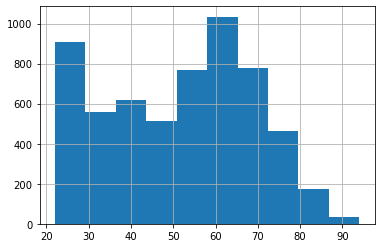

In [42]:
# Create age categories
df.ppage.hist()
plt.show()


In [43]:
df = df.astype({'ppage':'int64'})
for i in range(len(df_dum['ppage'])):
    if df.loc[i,'ppage']>=18 and df_dum.loc[i,'ppage']<=25:
        df.loc[i,'age']='18-25'
    elif df.loc[i,'ppage']<=35:
        df.loc[i,'age']='26-35'
    elif df.loc[i,'ppage']<=45:
        df.loc[i,'age']='36-45'
    elif df.loc[i,'ppage']<=55:
        df.loc[i,'age']='46-55'
    elif df.loc[i,'ppage']<=65:
        df.loc[i,'age']='56-65'
    else:
        df.loc[i,'age']='66+'

In [44]:
df = df.drop(['Unnamed: 0','weight','ppage'],axis=1).astype(object)

Index(['RespId', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7',
       'Q2_8', 'Q2_9',
       ...
       'Q30', 'Q31', 'Q32', 'Q33', 'educ', 'race', 'gender', 'income_cat',
       'voter_category', 'age'],
      dtype='object', length=117)

## 2.5 Make stacked columns graphs<a id='2.5_make_stacks'></a>

In [71]:
def make_stacks(df, feature): 
    counts_df = df.groupby([feature, 'voter_category'])['RespId'].count().unstack()
    always_percents_df = counts_df.T.div(counts_df.T.sum()).T
    fig, ax = plt.subplots()

    always_percents_df.plot(kind='bar', stacked=True, color=['green', 'blue','red'], ax=ax)

    ax.set_xlabel(feature)
    #ax.set_xticklabels([1, 2, 3], rotation=0)
    ax.set_ylabel('Proportion')

    color_patches = [
        Patch(facecolor='blue', label='rarely/never'),
        Patch(facecolor='green', label='always'),
        Patch(facecolor='red', label='sporadic')
    ]
    ax.legend(handles=color_patches)

    fig.suptitle(f"{feature} vs. voting frequency");   

In [143]:
features = list(df.columns)
features.remove('RespId')
features.remove('voter_category')

<ipython-input-71-217e397557d6>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


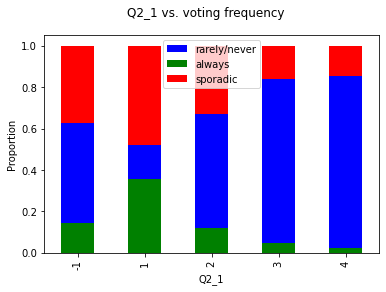

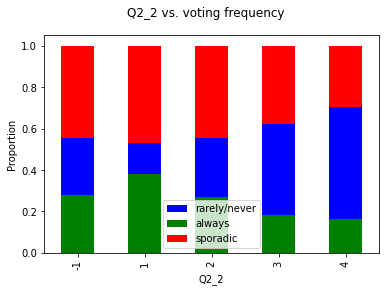

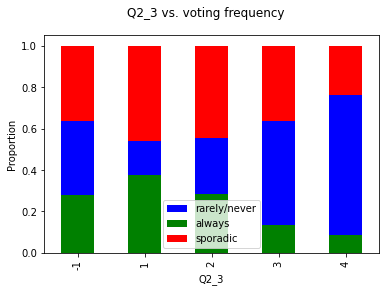

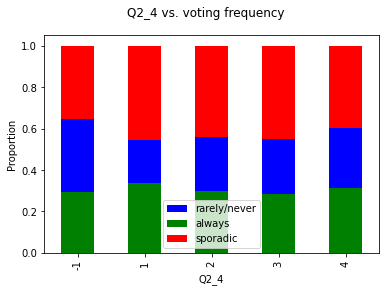

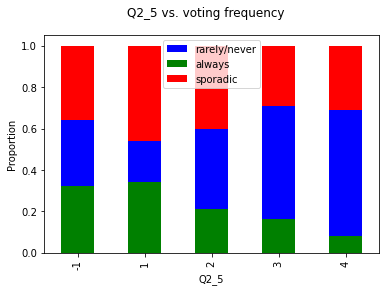

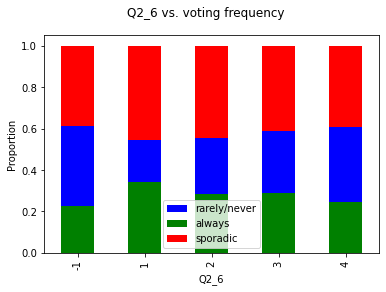

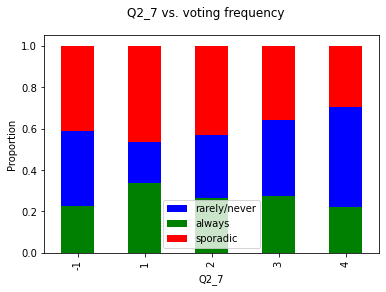

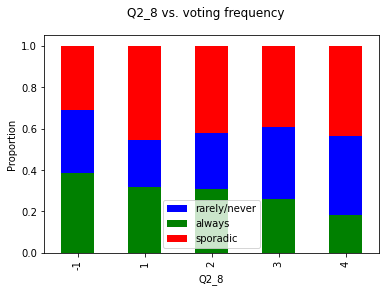

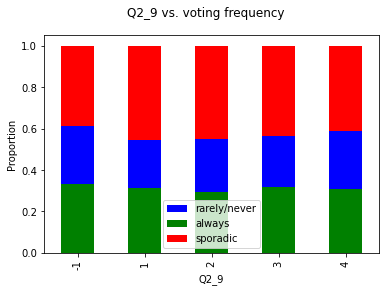

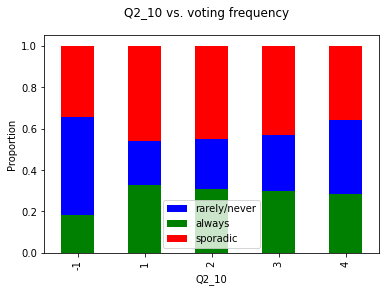

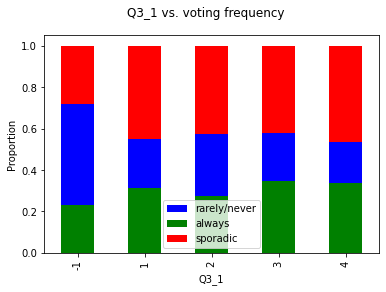

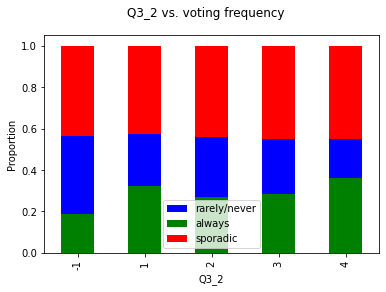

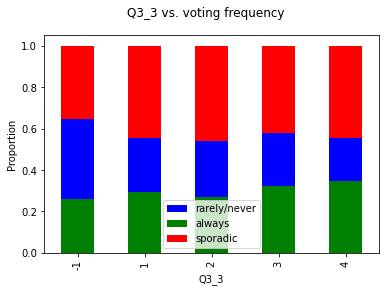

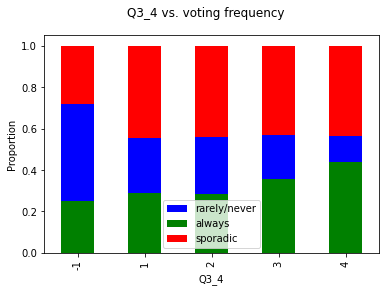

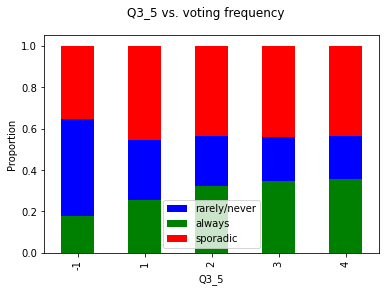

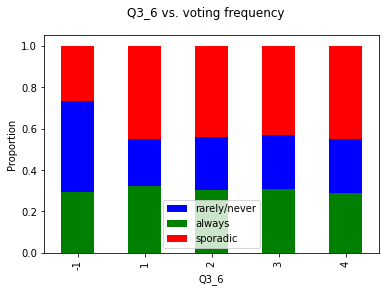

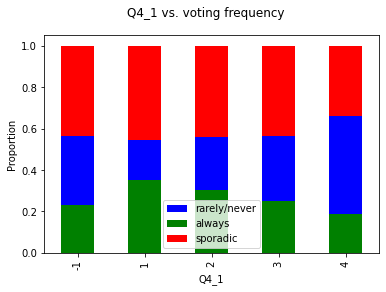

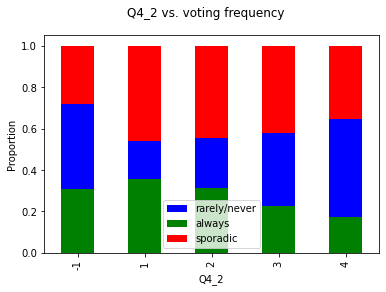

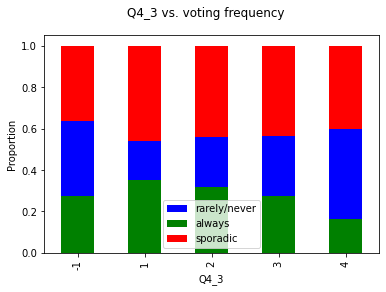

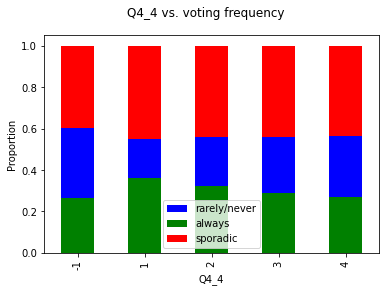

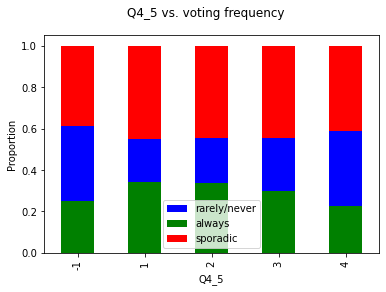

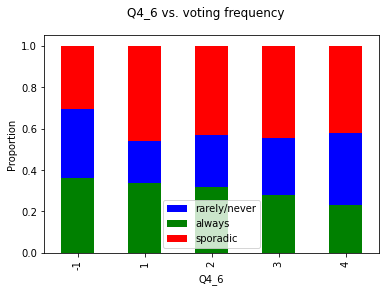

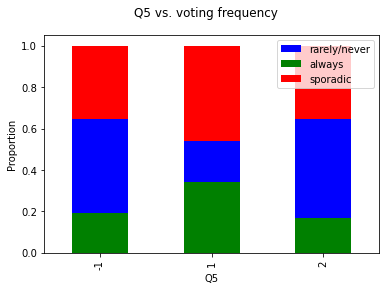

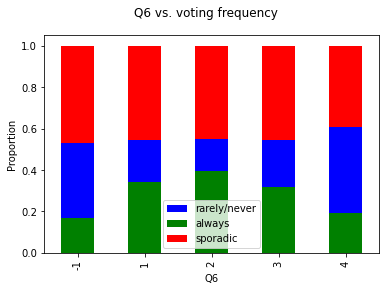

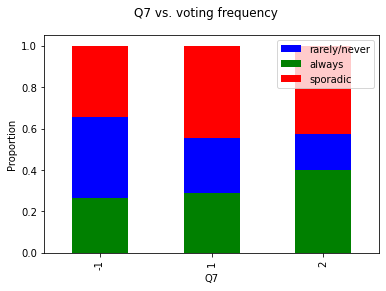

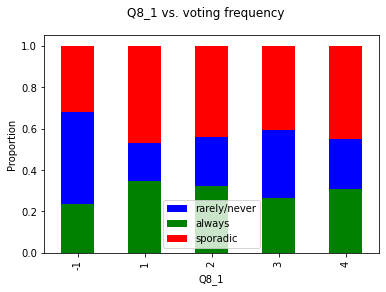

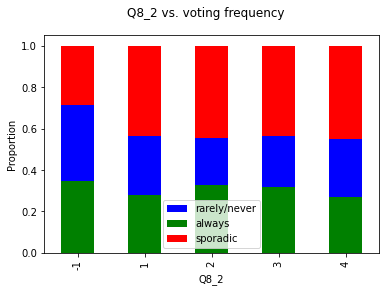

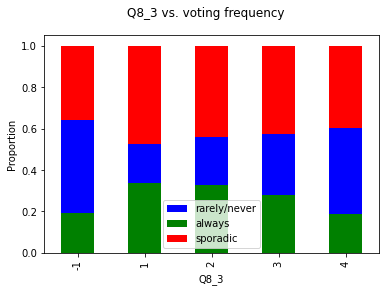

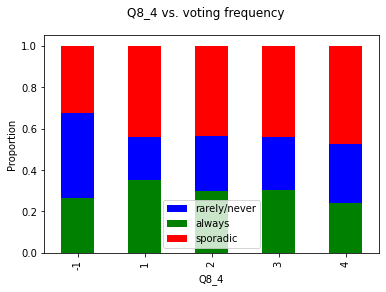

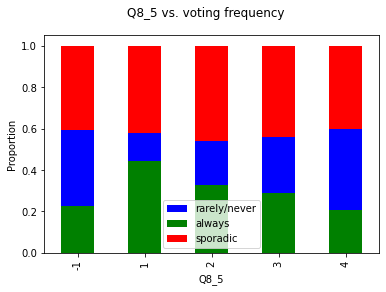

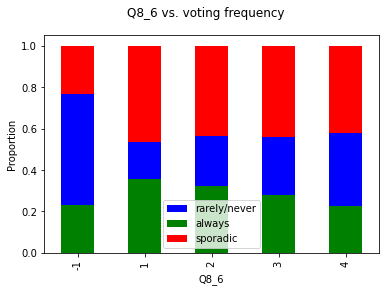

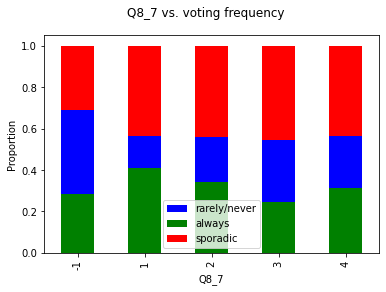

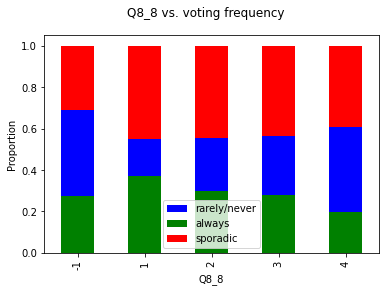

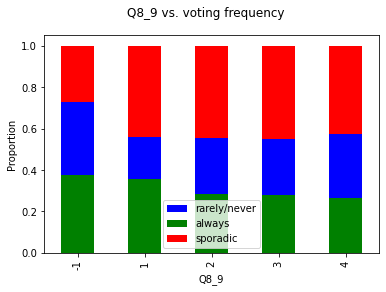

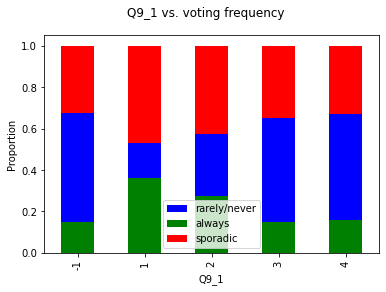

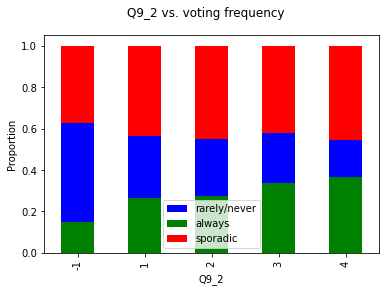

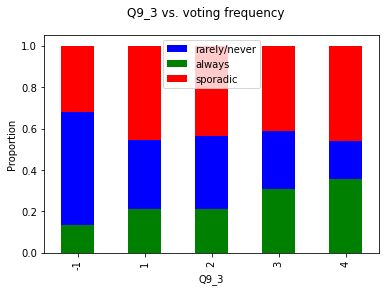

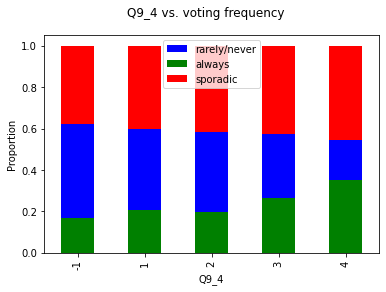

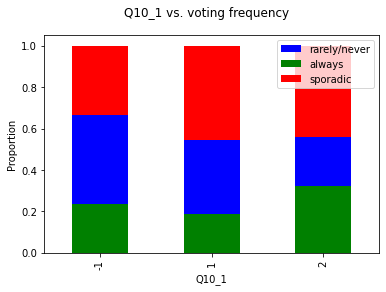

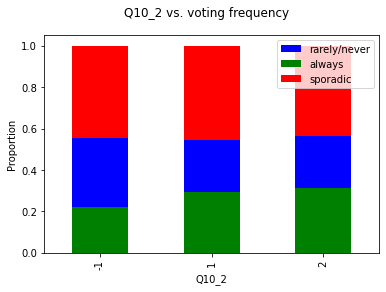

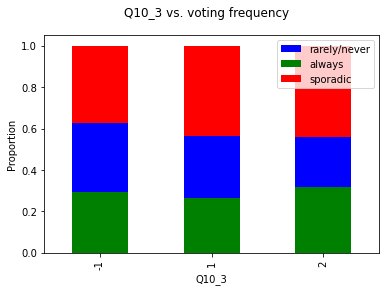

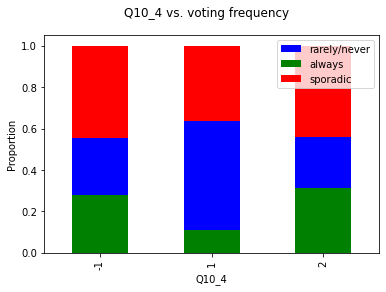

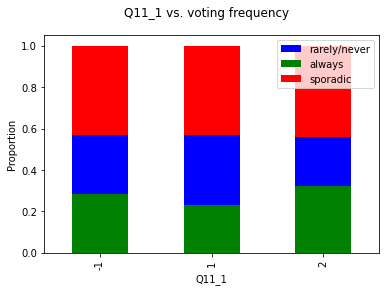

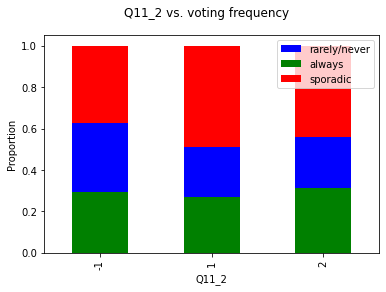

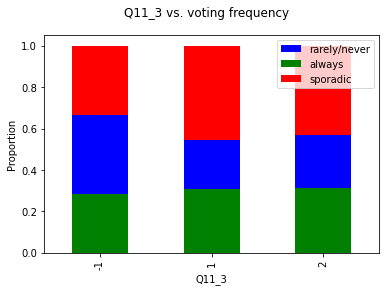

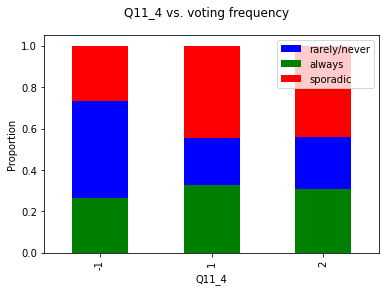

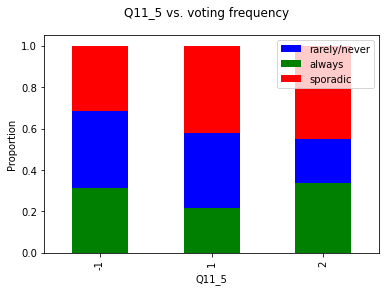

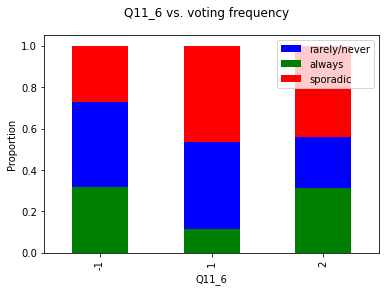

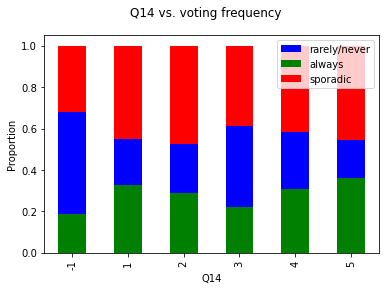

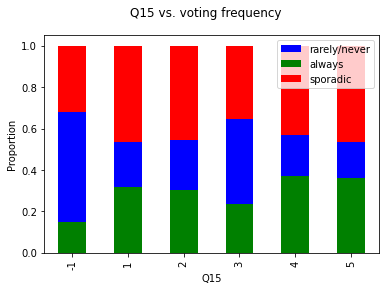

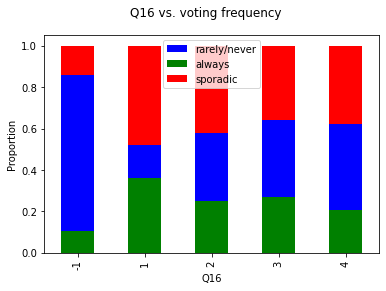

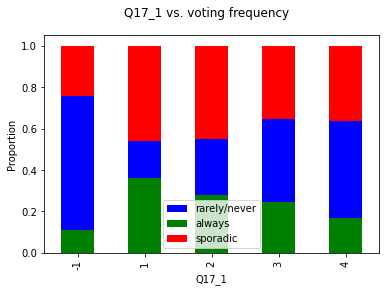

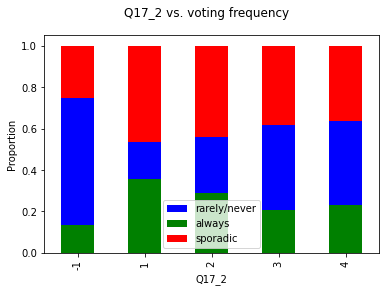

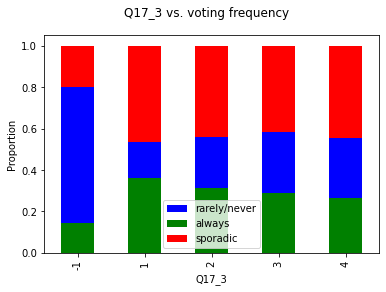

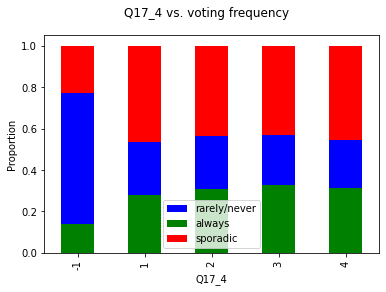

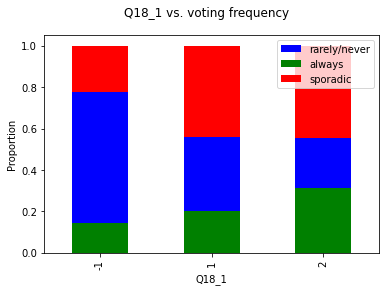

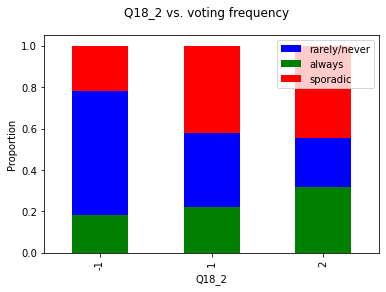

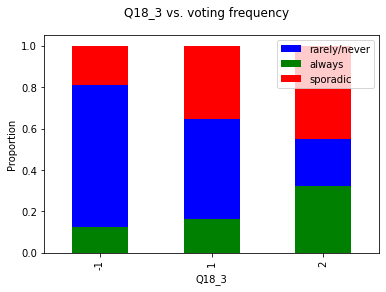

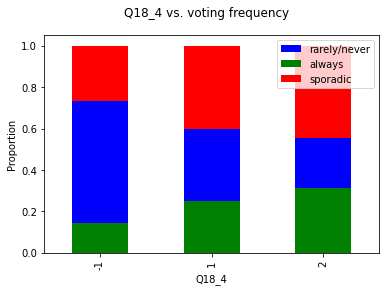

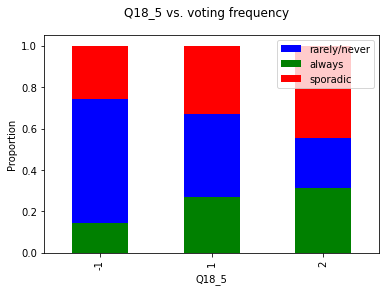

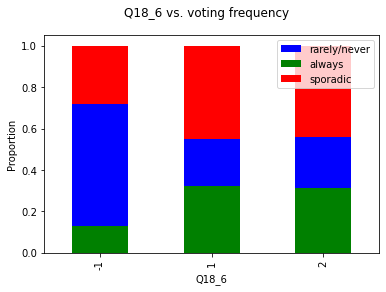

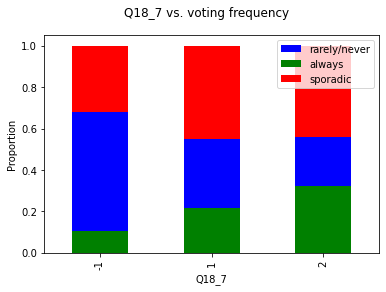

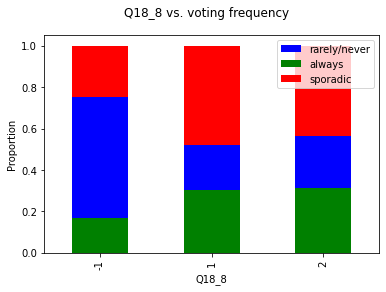

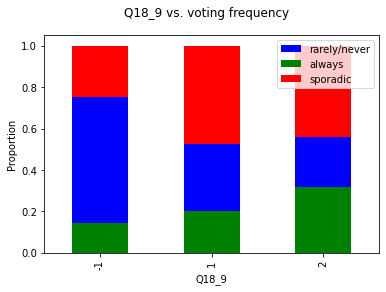

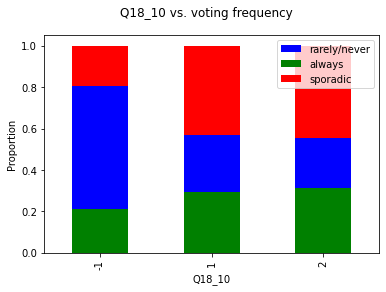

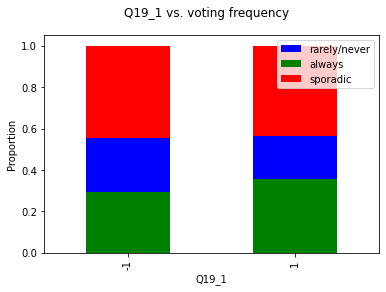

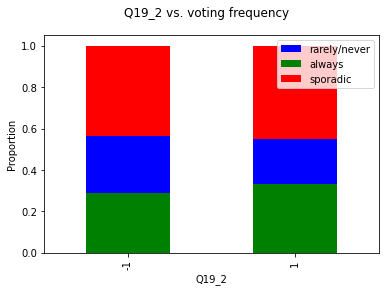

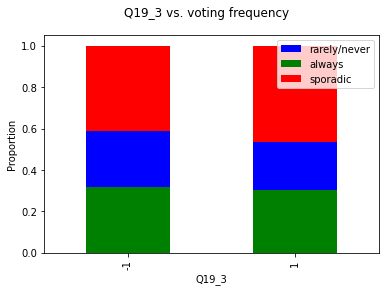

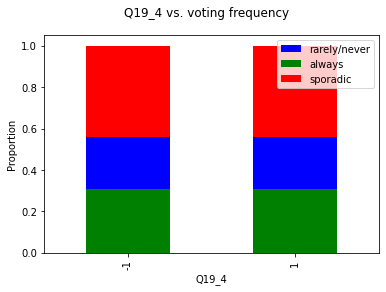

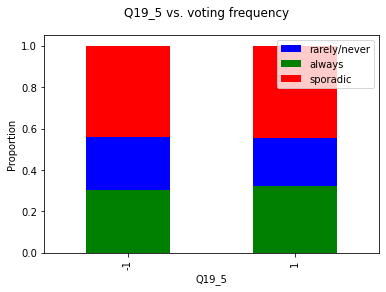

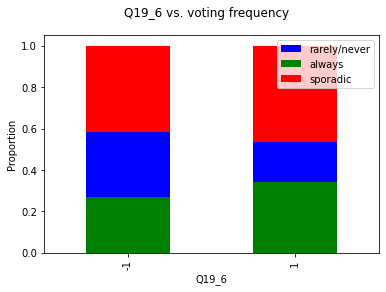

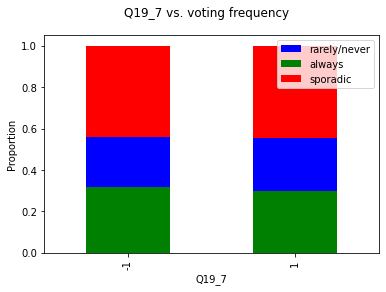

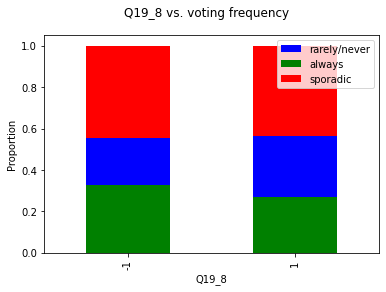

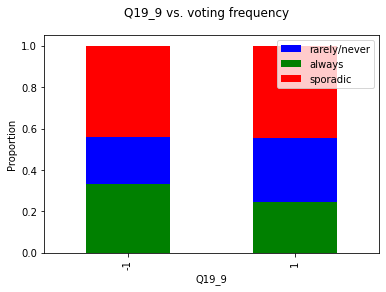

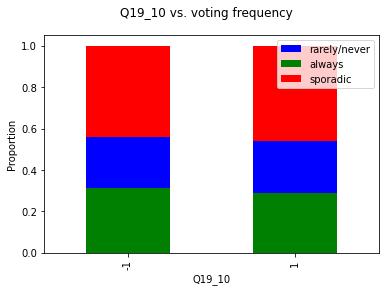

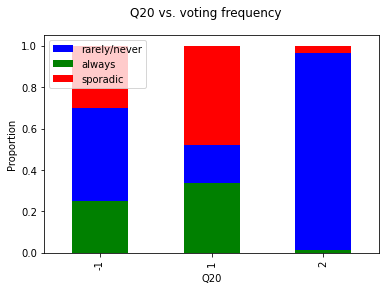

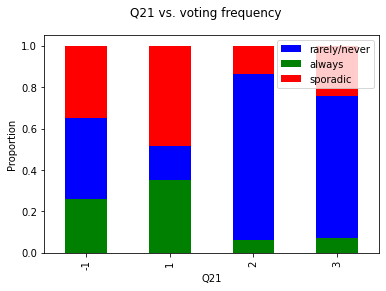

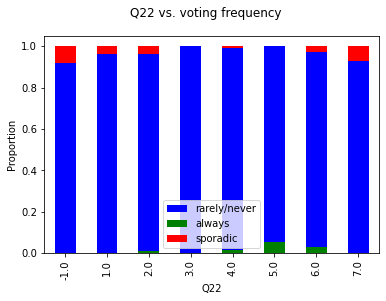

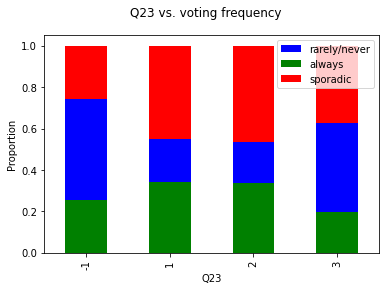

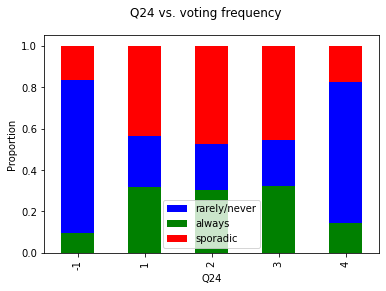

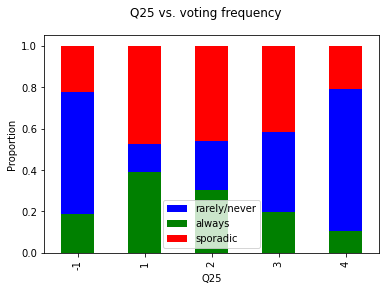

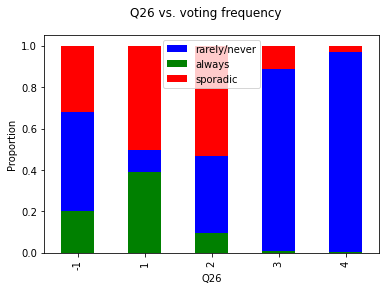

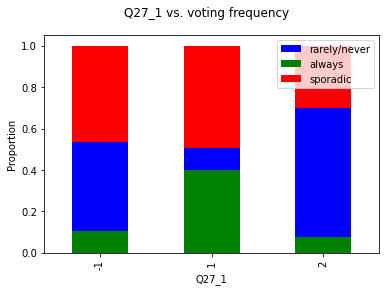

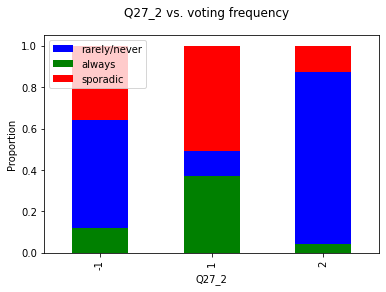

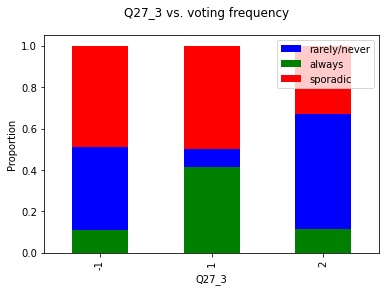

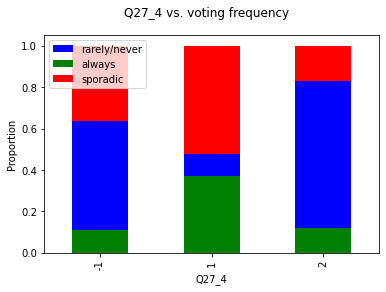

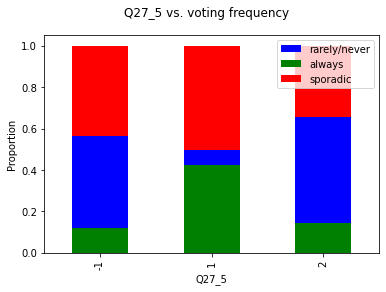

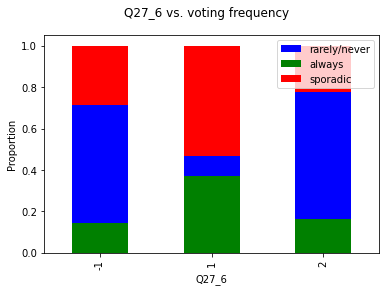

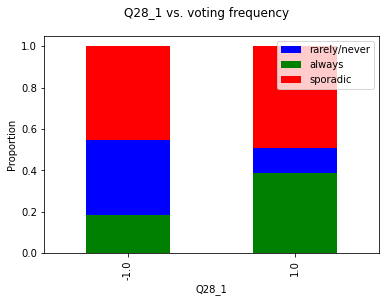

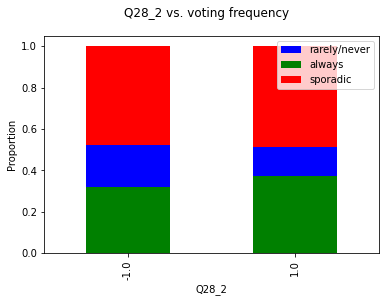

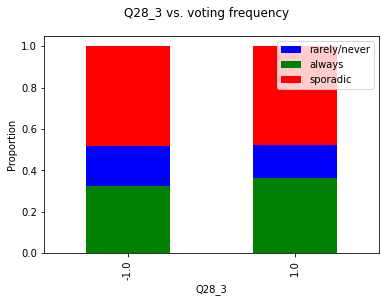

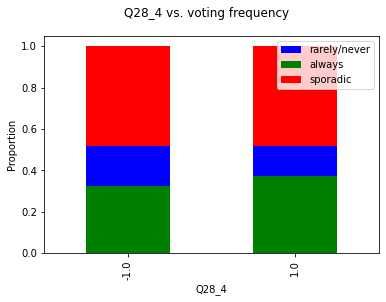

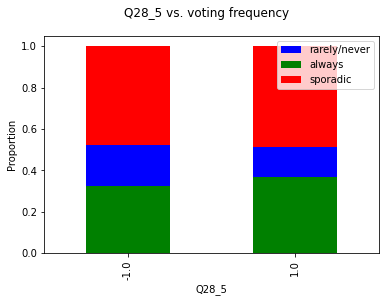

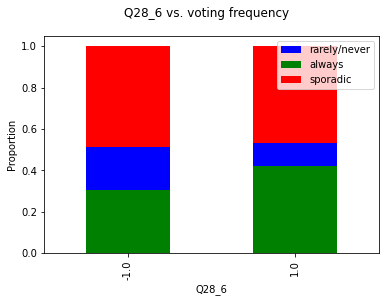

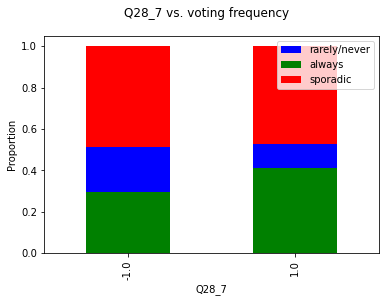

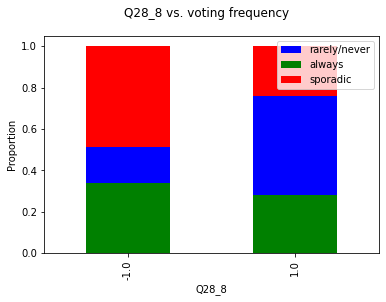

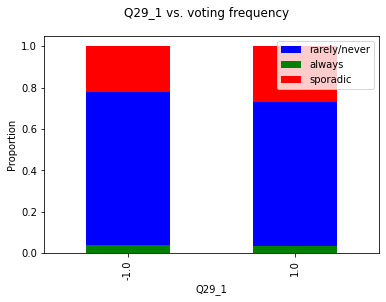

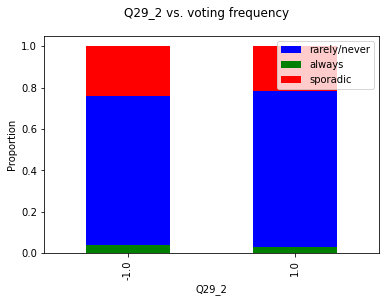

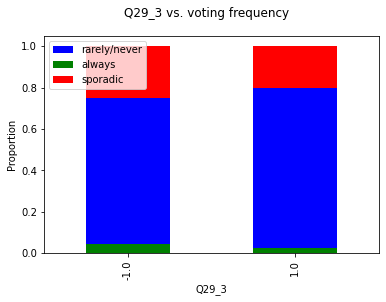

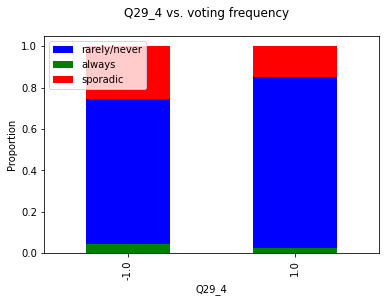

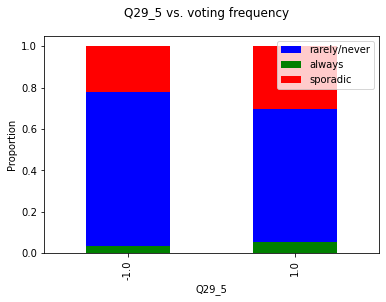

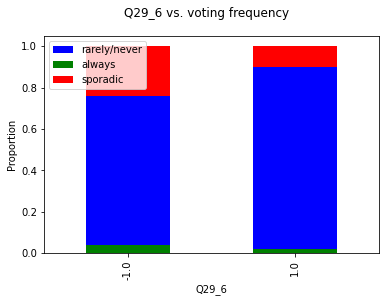

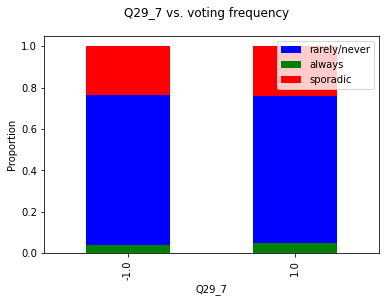

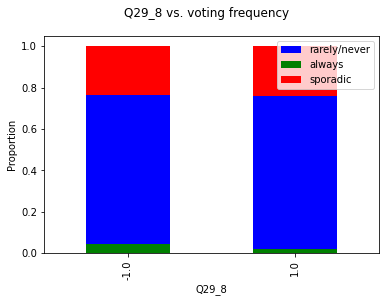

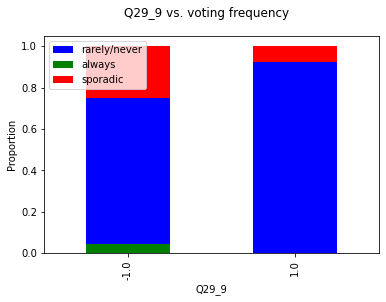

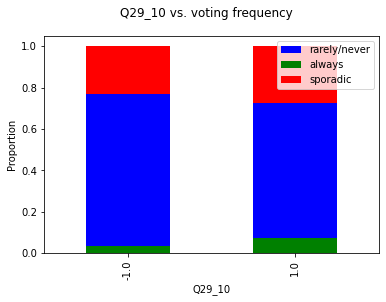

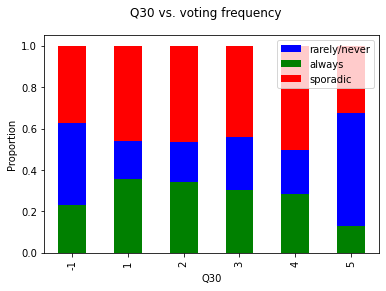

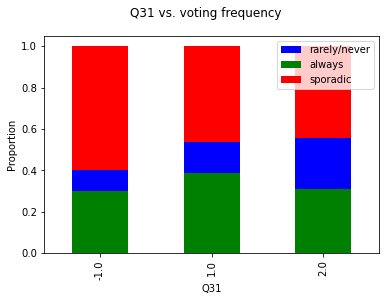

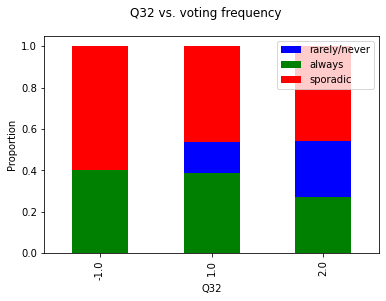

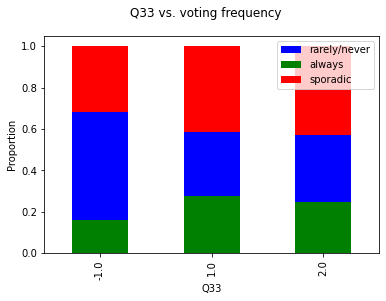

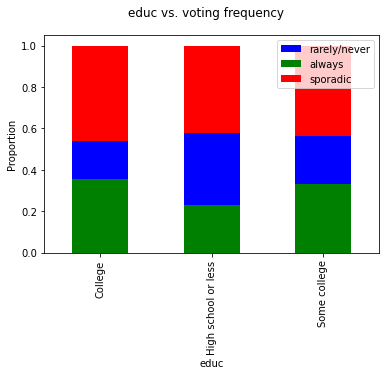

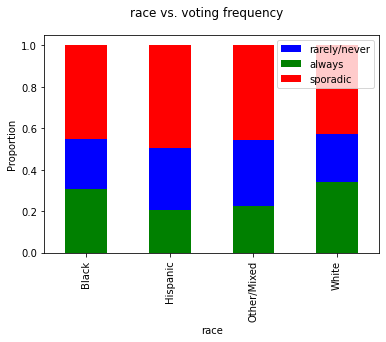

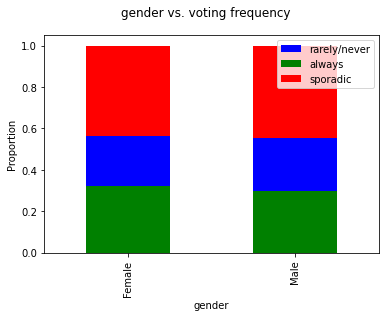

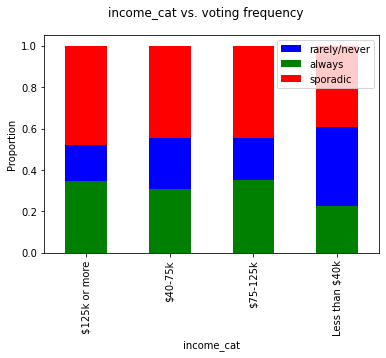

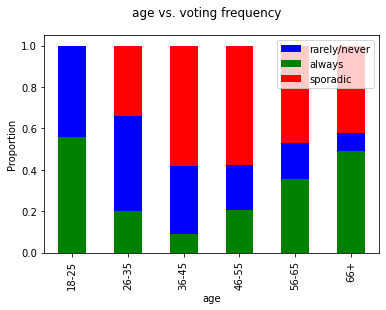

In [77]:
for feature in features:
    make_stacks(df, feature)

The stacked columns graphs reveal among other things that 'rarely/never' voters can dominate a feature if they were primarily the only ones that were asked the question. Also, some of the questions are a little too focused on who votes and who doesn't -- particularly Question 26 which asks the respondent to identify if they always, sometimes or never vote.

Therefore, the next step will be to eliminate those features that are only asked of some voters and which focus too much on who votes.

## 2.6 Identify Best Features<a id='2.6_best_features'></a>

In [146]:
# eliminate questions 20, 21, 22, 25, 26, 27, 28, 29
# consider also eliminating 24
features = ['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9', 'Q2_10', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q14', 'Q15', 'Q16', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q19_5', 'Q19_6', 'Q19_7', 'Q19_8', 'Q19_9', 'Q19_10', 'Q23', 'Q24', 'Q30', 'Q31', 'Q32', 'Q33', 'educ', 'race', 'gender', 'income_cat', 'age']

In [149]:
# identify the best features by how well the response distinguishes 
# 'always' or 'rarely/never' voters. This is measured by whether the 
# proportion of the responses are made by a voter category exceeds a
# threshold -- e.g. 0.65. Also, features are only counted if they exceed
# another threshold, the number of respondents from a voter category
# making that response -- e.g. 100.

best_dict_thresh={}
voter_categories = ['always','rarely/never']
best_features = []
percentage = 0.50
threshold = 100
count=0
for feature in features:
    counts_df = df.groupby([feature, 'voter_category'])['RespId'].count().unstack()
    always_percents_df = counts_df.T.div(counts_df.T.sum()).T
    for cat in voter_categories:
        for i in always_percents_df.index:
            if always_percents_df.loc[i,cat]>percentage and counts_df.loc[i,cat]>threshold:
                best_dict_thresh[feature+'_'+str(i)]=(cat,i,always_percents_df.loc[i,cat],counts_df.loc[i,cat])
                best_features.append(feature+'_'+str(i))
                count+=1
print(count)

12


In [150]:
best_dict_thresh

{'Q2_1_2': ('rarely/never', 2, 0.551490514905149, 407),
 'Q2_1_3': ('rarely/never', 3, 0.7931034482758621, 115),
 'Q2_1_4': ('rarely/never', 4, 0.83125, 133),
 'Q2_2_4': ('rarely/never', 4, 0.5379061371841155, 149),
 'Q2_3_3': ('rarely/never', 3, 0.5011135857461024, 225),
 'Q2_3_4': ('rarely/never', 4, 0.675, 108),
 'Q2_5_3': ('rarely/never', 3, 0.5459459459459459, 101),
 'Q9_1_3': ('rarely/never', 3, 0.50625, 162),
 'Q15_-1': ('rarely/never', -1, 0.53125, 102),
 'Q30_5': ('rarely/never', 5, 0.5447761194029851, 365),
 'Q33_-1.0': ('rarely/never', -1.0, 0.5197132616487455, 145),
 'age_18-25': ('always', '18-25', 0.5577557755775577, 169.0)}

In [104]:
df.columns

Index(['RespId', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7',
       'Q2_8', 'Q2_9',
       ...
       'Q30', 'Q31', 'Q32', 'Q33', 'educ', 'race', 'gender', 'income_cat',
       'voter_category', 'age'],
      dtype='object', length=117)

## 2.7 Create dummy variables<a id='2.7_make_dummies'></a>

In [152]:
df_dum = pd.get_dummies(df.drop('RespId',axis=1), drop_first=True)


In [153]:
df_dum.head()

,Q2_1_1,Q2_1_2,Q2_1_3,Q2_1_4,Q2_2_1,Q2_2_2,Q2_2_3,Q2_2_4,Q2_3_1,Q2_3_2,...,income_cat_$40-75k,income_cat_$75-125k,income_cat_Less than $40k,voter_category_rarely/never,voter_category_sporadic,age_26-35,age_36-45,age_46-55,age_56-65,age_66+
0,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


## 2.8 Modeling with Random Forests<a id='2.8_random_forests'></a>

In [154]:
# import Random Forests Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [155]:
# check for duplicate rows
duplicateRowsDF = df_dum[df_dum.duplicated()]
duplicateRowsDF

,Q2_1_1,Q2_1_2,Q2_1_3,Q2_1_4,Q2_2_1,Q2_2_2,Q2_2_3,Q2_2_4,Q2_3_1,Q2_3_2,...,income_cat_$40-75k,income_cat_$75-125k,income_cat_Less than $40k,voter_category_rarely/never,voter_category_sporadic,age_26-35,age_36-45,age_46-55,age_56-65,age_66+


In [158]:
df_dum.columns

Index(['Q2_1_1', 'Q2_1_2', 'Q2_1_3', 'Q2_1_4', 'Q2_2_1', 'Q2_2_2', 'Q2_2_3',
       'Q2_2_4', 'Q2_3_1', 'Q2_3_2',
       ...
       'income_cat_$40-75k', 'income_cat_$75-125k',
       'income_cat_Less than $40k', 'voter_category_rarely/never',
       'voter_category_sporadic', 'age_26-35', 'age_36-45', 'age_46-55',
       'age_56-65', 'age_66+'],
      dtype='object', length=312)

In [160]:
X = df_dum.drop('voter_category_rarely/never',axis=1).drop('voter_category_sporadic',axis=1)
y = df_dum['voter_category_rarely/never']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [161]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [162]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = None,n_jobs=-1)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.882
Random Forest: f1-score=0.874


30


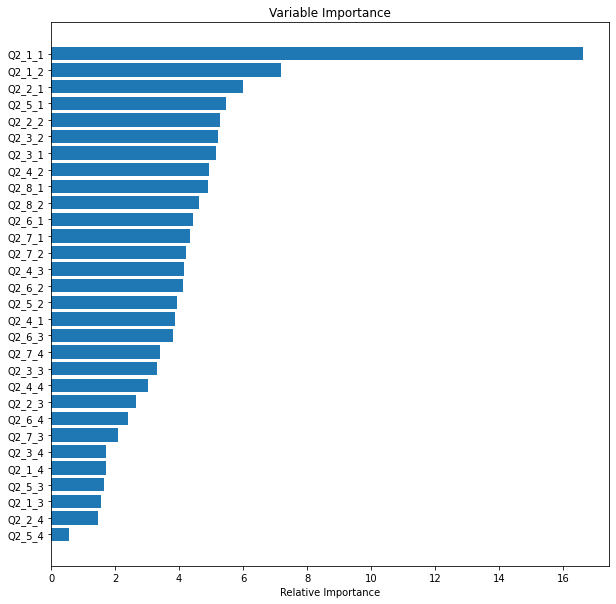

In [163]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Somewhat surprisingly, all of the most important features came from question 2. Run the model again but with just the best features identified earlier.

In [165]:
print(best_features)

['Q2_1_2', 'Q2_1_3', 'Q2_1_4', 'Q2_2_4', 'Q2_3_3', 'Q2_3_4', 'Q2_5_3', 'Q9_1_3', 'Q15_-1', 'Q30_5', 'Q33_-1.0', 'age_18-25']


In [175]:
df_dum2 = pd.get_dummies(df.drop('RespId',axis=1))

In [178]:
features = ['Q2_1_2', 'Q2_1_3', 'Q2_1_4', 'Q2_2_4', 'Q2_3_3', 'Q2_3_4', 'Q2_5_3', 'Q9_1_3', 'Q15_-1', 'Q30_5', 'Q33_-1.0', 'age_18-25']

In [183]:
X = df_dum2[best_features]
y = df_dum2['voter_category_rarely/never']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [184]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = None,n_jobs=-1)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.790
Random Forest: f1-score=0.760


12


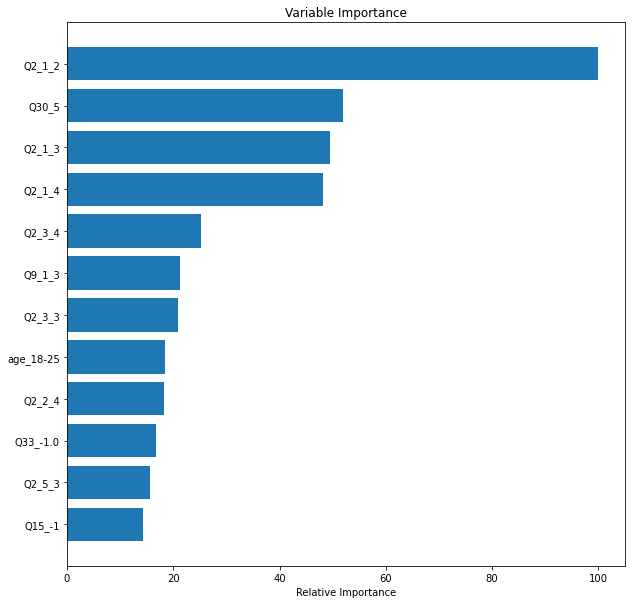

In [185]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()